In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [5]:
import sagemaker
import sagemaker.amazon.common as smac
import os
import altair as alt

ModuleNotFoundError: No module named 'altair'

In [6]:
df = pd.read_csv("crypto_compare.csv", index_col=0)

In [7]:
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [8]:
df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [9]:
# Cryptocurrencies on trading
df = df[df['IsTrading']==True]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [10]:
# Cryptocurrencies with a working algorithm
df_algor = df[df['Algorithm'] != "N/A"]
df_algor.head()


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [11]:
# Removing the "Istrading" column
df_crypto = df_algor.drop(columns="IsTrading")
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [12]:
# Removing rows with missing data
df_crypto.dropna(inplace = True)

In [13]:
# Checking isnull
for column in df_crypto.columns:
    print(f"Column {column} has {df_crypto[column].isnull().sum()} null values")


Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [14]:
# Removing rows with cryptocurrencies without coins mined
df_crypto = df_crypto[df_crypto['TotalCoinsMined'] != 0]
df_crypto.head()


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [16]:
# Dropping rows where there are 'N/A' text values

In [17]:
df_crypto.dropna()
df_crypto.tail()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [18]:
# Fetching the cryptocurrencies names 

In [19]:
X = df_crypto["CoinName"]


In [20]:
df_X = df_crypto[["CoinName"]]
df_X.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [21]:
# Removing the cryptocurrencies names
df_crypto_clean = df_crypto.drop(columns="CoinName")
df_crypto_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [22]:
# Creating dummies variables for text features

In [23]:
df_dummies = pd.get_dummies(df_crypto_clean)

In [24]:
df_dummies.head()

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
42,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 42 to XBC
Columns: 379 entries, TotalCoinsMined to TotalCoinSupply_9999999
dtypes: float64(1), uint8(378)
memory usage: 225.1+ KB


In [26]:
# Standardizing data cScore
df_standar = StandardScaler().fit_transform(df_dummies)
print(df_standar[0:5])


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


[[-0.11674788 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.09358885 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [ 0.52587231 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.11635442 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.11438445 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
# Reducing Dimensions Using PCA

In [28]:
# Applying PCA to reduce dimensions to 3 principal components

# Initialize PCA model
pca = PCA(n_components=3)

# Get three principal components for the df_standar.
redu_pca = pca.fit_transform(df_standar)

redu_pca

array([[-0.29061182, -0.08690653, -0.22991701],
       [-0.27643334, -0.09211629, -0.22580003],
       [ 0.2568044 , -0.07844407, -0.29369871],
       ...,
       [ 0.17742323, -0.17866936, -0.15935126],
       [-0.27756694, -0.19924002,  0.19954497],
       [-0.21647089, -0.13933536,  0.0246495 ]])

In [30]:
# Creating a DataFrame with the principal components data

In [31]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=redu_pca, columns=["principal component 1", "principal component 2", "principal component 3"])

df_pca.head()


,principal component 1,principal component 2,principal component 3
0,-0.290612,-0.086907,-0.229917
1,-0.276433,-0.092116,-0.225800
2,0.256804,-0.078444,-0.293699
3,-0.265088,-0.191848,0.012982
4,-0.139423,-0.200088,0.099039


In [32]:
# Clustering Cryptocurrencies Using K-Means
# Finding the Best Value for k Using the Elbow Curve

In [33]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)


# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)



In [34]:
df_elbow.head()

,k,inertia
0,1,4874.772859
1,2,3346.441961
2,3,1991.451473
3,4,659.362312
4,5,287.093568


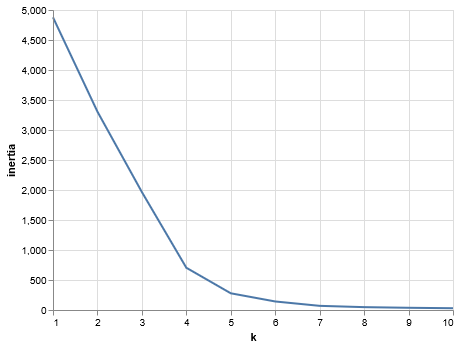

In [84]:
# running locally working in how altair must be recognized at sagemaker
#chart = alt.Chart(df_elbow).mark_line().encode(
#    x='k',
#    y='inertia',
#    )
# chart

In [35]:
# Running K-Means with k=<you best value for k here

In [36]:
# Initialize the K-Means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Creating a new DataFrame including predicted clusters and cryptocurrencies features
df_pca["class"] = model.labels_
df_pca.head()


,principal component 1,principal component 2,principal component 3,class
0,-0.290612,-0.086907,-0.229917,0
1,-0.276433,-0.092116,-0.225800,0
2,0.256804,-0.078444,-0.293699,0
3,-0.265088,-0.191848,0.012982,0
4,-0.139423,-0.200088,0.099039,0


In [37]:
# Creating a new DataFrame


In [38]:
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [39]:
df_pca.head()


,principal component 1,principal component 2,principal component 3,class
0,-0.290612,-0.086907,-0.229917,0
1,-0.276433,-0.092116,-0.225800,0
2,0.256804,-0.078444,-0.293699,0
3,-0.265088,-0.191848,0.012982,0
4,-0.139423,-0.200088,0.099039,0


In [40]:
df_pca["symbol"] = df_X.index
df_pca.head()

,principal component 1,principal component 2,principal component 3,class,symbol
0,-0.290612,-0.086907,-0.229917,0,42
1,-0.276433,-0.092116,-0.225800,0,404
2,0.256804,-0.078444,-0.293699,0,1337
3,-0.265088,-0.191848,0.012982,0,BTC
4,-0.139423,-0.200088,0.099039,0,ETH


In [41]:
df_crypto_clean.reset_index(inplace=True)
df_crypto_clean.head()

,index,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000
2,1337,X13,PoW/PoS,2.927942e+10,314159265359
3,BTC,SHA-256,PoW,1.792718e+07,21000000
4,ETH,Ethash,PoW,1.076842e+08,0


In [42]:
df_cd = pd.merge(df_crypto_clean, df_pca, how='inner', left_on = 'index', right_on = 'symbol', left_index=False)
df_cd.head()

,index,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class,symbol
0,42,Scrypt,PoW/PoS,4.199995e+01,42,-0.290612,-0.086907,-0.229917,0,42
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.276433,-0.092116,-0.225800,0,404
2,1337,X13,PoW/PoS,2.927942e+10,314159265359,0.256804,-0.078444,-0.293699,0,1337
3,BTC,SHA-256,PoW,1.792718e+07,21000000,-0.265088,-0.191848,0.012982,0,BTC
4,ETH,Ethash,PoW,1.076842e+08,0,-0.139423,-0.200088,0.099039,0,ETH


In [43]:
df_cd.set_index('index',inplace=True)
df_cd.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class,symbol
index,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.290612,-0.086907,-0.229917,0,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.276433,-0.092116,-0.225800,0,404
1337,X13,PoW/PoS,2.927942e+10,314159265359,0.256804,-0.078444,-0.293699,0,1337
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.265088,-0.191848,0.012982,0,BTC
ETH,Ethash,PoW,1.076842e+08,0,-0.139423,-0.200088,0.099039,0,ETH


In [44]:
clustered_df= df_cd[['Algorithm','ProofType','TotalCoinsMined','TotalCoinSupply','principal component 1','principal component 2','principal component 3','symbol','class']]
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,symbol,class
index,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.290612,-0.086907,-0.229917,42,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.276433,-0.092116,-0.225800,404,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,0.256804,-0.078444,-0.293699,1337,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.265088,-0.191848,0.012982,BTC,0
ETH,Ethash,PoW,1.076842e+08,0,-0.139423,-0.200088,0.099039,ETH,0


In [45]:
# Adding CoinName column to clustered_df and changing the name to df


In [46]:
clustered_df.reset_index(inplace=True)
df_X.reset_index(inplace=True)

In [47]:
df=pd.merge(clustered_df, df_X, on='index')
df.head()


,index,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,symbol,class,CoinName
0,42,Scrypt,PoW/PoS,4.199995e+01,42,-0.290612,-0.086907,-0.229917,42,0,42 Coin
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.276433,-0.092116,-0.225800,404,0,404Coin
2,1337,X13,PoW/PoS,2.927942e+10,314159265359,0.256804,-0.078444,-0.293699,1337,0,EliteCoin
3,BTC,SHA-256,PoW,1.792718e+07,21000000,-0.265088,-0.191848,0.012982,BTC,0,Bitcoin
4,ETH,Ethash,PoW,1.076842e+08,0,-0.139423,-0.200088,0.099039,ETH,0,Ethereum


In [48]:
### Visualizing Results

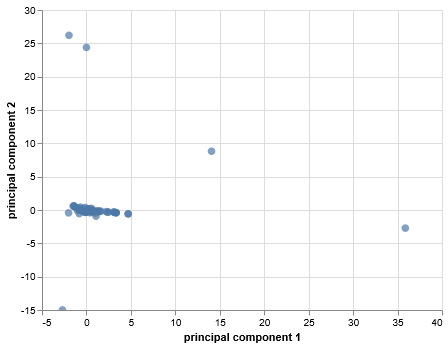

In [99]:
# working in how import altair is recognized on sagemaker
#cluster_chart=alt.Chart(df).mark_circle(size=60).encode(
#    x='principal component 1',
#   y='principal component 2',
#    tooltip=['principal component 3']).interactive()
# cluster_chart

In [281]:
#

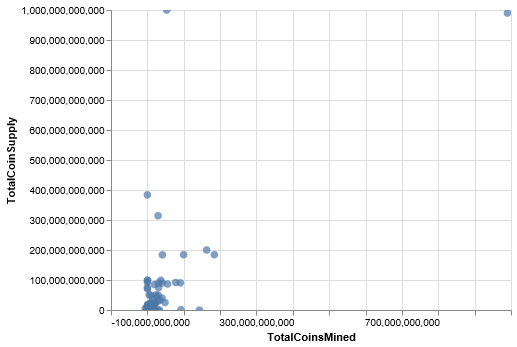

In [101]:
# working in how import altair on sagemaker
#df = df.astype({"TotalCoinSupply":'float64'})
#trade_chart=alt.Chart(df).mark_circle(size=60).encode(
#   x='TotalCoinsMined',
#    y='TotalCoinSupply',
#    tooltip=['CoinName']).interactive()
# trade_chart

In [100]:
# Altair scatter plot to visualize the tradable currencies Total Coins Mined and Total Coin Supply

In [49]:
df_table = df[["CoinName", "Algorithm", "ProofType", "TotalCoinsMined", "TotalCoinSupply", "class"]]
display(df_table.head(10))

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,0
1,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,0
2,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,0
3,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,0
4,Ethereum,Ethash,PoW,1.076842e+08,0,0
5,Litecoin,Scrypt,PoW,6.303924e+07,84000000,0
6,Dash,X11,PoW/PoS,9.031294e+06,22000000,0
7,Monero,CryptoNight-V7,PoW,1.720114e+07,0,0
8,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000,0
9,ZCash,Equihash,PoW,7.383056e+06,21000000,0
